## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e8e3780>,
      dtype=object)

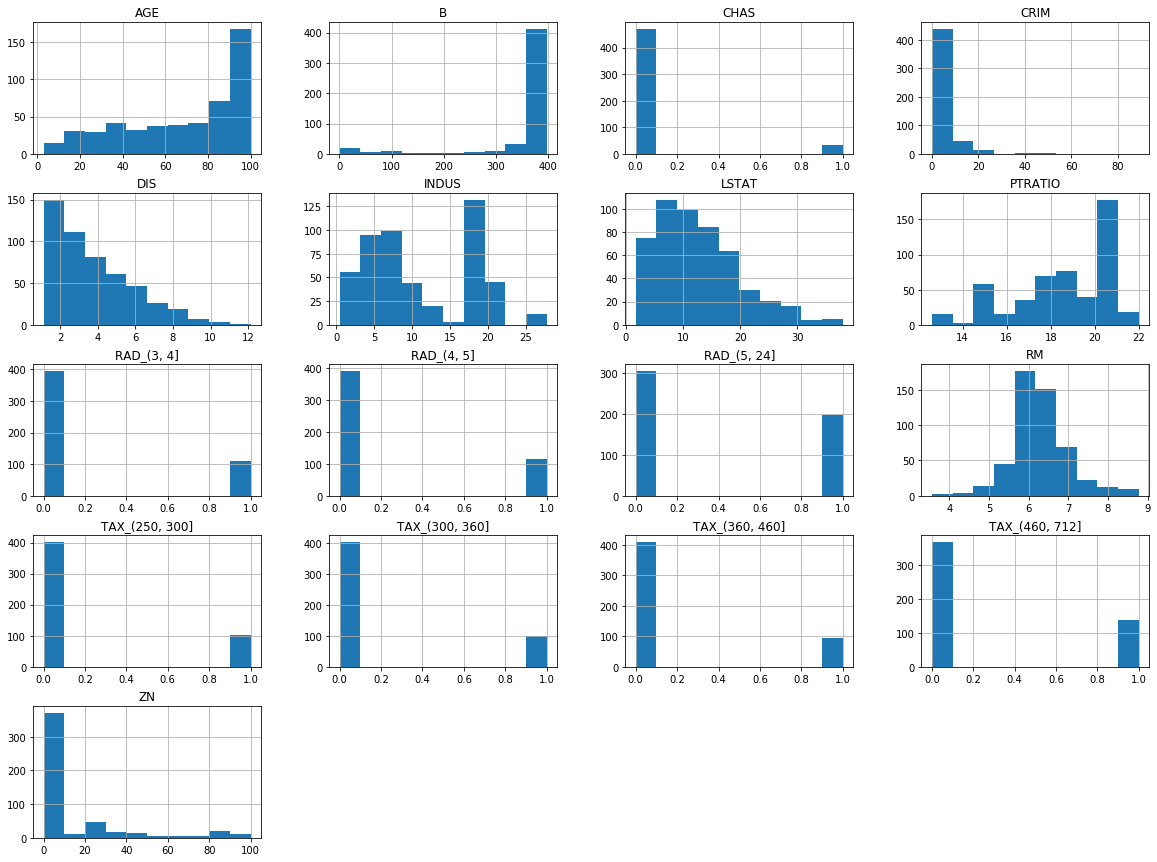

In [25]:
# Your code here
boston_features.hist(figsize=(20,15))

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f777518>,
      dtype=object)

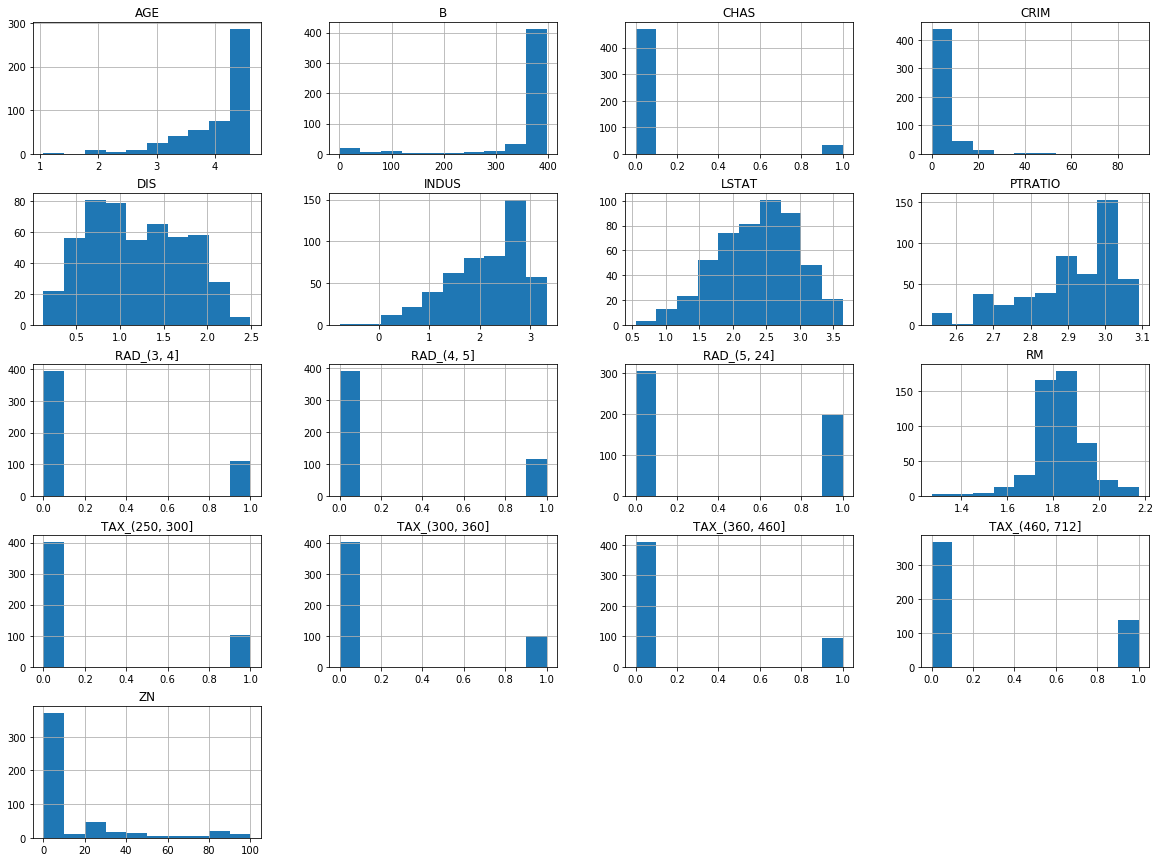

In [26]:
# Your code here
import numpy as np
problems=['DIS','AGE','INDUS','LSTAT','PTRATIO','RM']
for feat in problems:
    boston_features[feat] = boston_features[feat].map(lambda x: np.log(x))
boston_features.hist(figsize=(20,15))

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [30]:
# Your code here
boston_features['OVER 25k Feet'] 

SyntaxError: invalid syntax (<ipython-input-30-a2fc7d4d84d5>, line 2)

## Try different types of transformations on the continuous variables

In [ ]:
#We decided not to include "ZN" anymore
# We decided to perform transformations on the log-transformed data, 
# except for "AGE" and "B" where the logtransforms did not improve the skewness.


Store your final features in a DataFrame `features_final`: 

In [31]:
# Your code here
age = boston_cont['AGE']
b = boston_cont['B']
rm = boston_cont['RM']
logcrim = data_log['CRIM'] 
logdis = data_log['DIS']  
logindus = data_log['INDUS'] 
loglstat = data_log['LSTAT']
logptratio = data_log['PTRATIO']

features_final= pd.DataFrame([])

features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['B'] = (b-min(b))/(max(b)-min(b))
features_final['RM'] = (rm-min(rm))/(max(rm)-min(rm))
features_final['DIS']   = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final['LSTAT'] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final['AGE'] = (age-np.mean(age))/(max(age)-min(age))
features_final['PTRATIO'] = (logptratio)/(np.linalg.norm(logptratio))

features_final.hist(figsize  = [8, 8]);

NameError: name 'boston_cont' is not defined

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!